In [2]:
import os
import librosa
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, StandardScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv("audio_features.csv")
df.head()

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,origin_sample,LABEL
0,0.375227,0.064563,2459.947357,2434.934003,5019.828288,0.124641,-349.60600,69.490540,-5.014993,9.292723,...,-8.939626,-0.228075,-3.724141,-2.760279,-7.130298,-2.885548,-3.816603,-4.658828,Obama-to-Biden,FAKE
1,0.265879,0.064633,1771.264906,2054.276087,3259.837850,0.079384,-309.35730,102.684265,-0.217040,6.763915,...,-10.282154,-5.383380,-8.223937,-6.031207,-11.122187,-4.667199,-3.794462,-6.131008,Obama-to-Biden,FAKE
2,0.344223,0.032006,2756.427453,2556.483794,5510.107422,0.151779,-395.46002,67.343710,1.611470,15.029048,...,-4.041812,0.001402,-3.974379,-1.699904,-4.618232,-1.402696,-1.930047,-2.451176,Obama-to-Biden,FAKE
3,0.467234,0.016750,2068.743872,2003.275673,3906.083171,0.113754,-368.99106,98.130714,-36.922684,-10.113725,...,-0.317975,0.102127,-1.771509,-5.013602,-5.357713,-0.996470,-3.404845,-3.700651,Obama-to-Biden,FAKE
4,0.369112,0.050818,2181.070240,2193.115139,4031.294759,0.116534,-348.53130,78.893265,-16.373130,-0.023123,...,-5.441096,-4.479549,-4.861004,-2.209938,-5.779118,-1.290936,-1.573276,-4.030232,Obama-to-Biden,FAKE


In [4]:
X = df.iloc[:, :-2]
y = df.iloc[:, -1]

In [5]:
print(X.columns)

Index(['chroma_stft', 'rms', 'spectral_centroid', 'spectral_bandwidth',
       'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4',
       'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11',
       'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18',
       'mfcc19', 'mfcc20'],
      dtype='object')


In [6]:
print(y)

0       FAKE
1       FAKE
2       FAKE
3       FAKE
4       FAKE
        ... 
6000    REAL
6001    REAL
6002    REAL
6003    REAL
6004    REAL
Name: LABEL, Length: 6005, dtype: object


In [7]:
lb = preprocessing.LabelBinarizer()
y = lb.fit_transform(y)
y = y.ravel()
print(y)

[0 0 0 ... 1 1 1]


In [8]:
X_train,X_Test,Y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [9]:
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_Test_std=scaler.transform(X_Test)

In [10]:
Y_train_series = pd.Series(Y_train)
print(Y_train_series.value_counts())

0    4200
1     604
Name: count, dtype: int64


In [16]:
model = KNeighborsClassifier(n_neighbors=5,p=2)#99.3,Euclidean distance
#model =KNeighborsClassifier(n_neighbors=3,P=1) #99.2 ,Manhattan distance
#model = BernoulliNB() # 90.3

model.fit(X_train_std, Y_train)

KNeighborsClassifier()

In [17]:
pred_values = model.predict(X_Test_std)

# Evaluate the model
acc = accuracy_score(y_test, pred_values)
prec = precision_score(y_test,pred_values)
rec = recall_score(y_test,pred_values)
f1 = f1_score(y_test,pred_values)

# Print evaluation metrics
print("Accuracy:", round(acc, 3) * 100)
print("Precision:", round(prec, 3) * 100)
print("Recall:", round(rec, 3) * 100)
print("F1-Score:", round(f1, 3)*100)

Accuracy: 99.3
Precision: 100.0
Recall: 94.0
F1-Score: 96.89999999999999


In [18]:
input_data=(0.4090154,0.0625356,2108.50052,1916.23644,3762.179565,0.12310791,-254.82565,123.88423,-2.9245548,23.45007,10.104989,-1.8787591,1.3757514,-0.61563754,-5.957731,5.6874523,-8.361018,1.6729586,-0.1934279,5.821897,1.7073617,-0.88956475,1.2821686,5.3945336,-2.107336,-1.0151453
)

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)

[1]


c:\Users\manis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [19]:
input_data2=(4.0100627,4.0100627,4.0100627,4.0100627,4.0100627,4.0100627,4.0100627,4.0100627,4.0100627,4.0100627,4.0100627,	4.0100627,4.0100627,4.0100627,4.0100627,4.0100627,4.0100627,4.0100627,4.0100627,4.0100627,4.0100627,4.0100627,4.0100627,4.0100627,4.0100627,4.0100627
)
input_data_as_numpy_array2= np.asarray(input_data2)
input_data_reshaped2= input_data_as_numpy_array2.reshape(1,-1)
std_data2= scaler.transform(input_data_reshaped2)

prediction2= model.predict(std_data2)
print(prediction2)

[0]


c:\Users\manis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<Axes: >

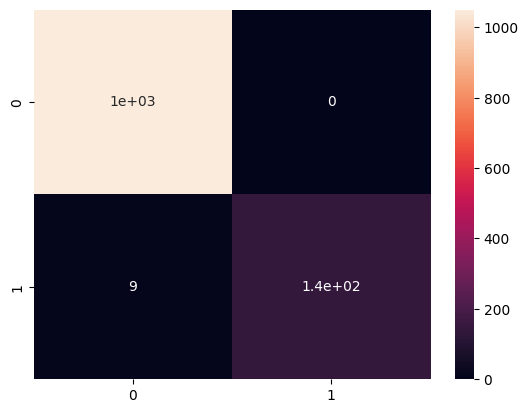

In [20]:
cf_matrix = confusion_matrix(y_test,pred_values)
tn, fp, fn, tp = cf_matrix.ravel()
sns.heatmap(cf_matrix, annot=True)